In [45]:
import numpy as np
from numba import njit
import time
import psutil
import os


# num_cores = psutil.cpu_count(logical=True) # Получаем количество логических процессоров (ядер)

def get_cpu_time(): # Функция для получения времени использования CPU текущим процессом
    process = psutil.Process(os.getpid()) # Получаем информацию о процессе
    return process.cpu_times().user + process.cpu_times().system # Возвращаем сумму пользовательского и системного времени CPU


# start_real_time = time.time() # Запоминаем время начала выполнения программы
# start_cpu_time = get_cpu_time() # Запоминаем начальное CPU время

# # Симуляция некоторой нагрузки на CPU
# for i in range(100000000):
#     x = i * 3.14159  # Произвольная нагрузка на CPU


# end_real_time = time.time() # Запоминаем время завершения программы
# end_cpu_time = get_cpu_time() # Запоминаем конечное CPU время
# total_cpu_time = end_cpu_time - start_cpu_time # Рассчитываем общее CPU время, затраченное программой
# real_time = end_real_time - start_real_time # Рассчитываем реальное время выполнения программы (wall clock time)
# cpu_usage_percent = (total_cpu_time / (real_time * num_cores)) * 100 # Процент использования CPU с учётом всех ядер

# # Вывод результатов
# print(f"Общее CPU время: {total_cpu_time:.6f} секунд")
# print(f"Реальное время выполнения: {real_time:.6f} секунд")
# print(f"Количество логических ядер: {num_cores}")
# print(f"Процент загрузки CPU программой (учитывая все ядра): {cpu_usage_percent:.2f}%")

In [46]:
def manual_matrix_multiply(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]

    return C

@njit
def numba_matrix_multiply(A, B, C, n):

    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]

    return C

def numpy_dot_multiply(A, B):
    return np.dot(A, B)

In [47]:
current_time = 0
m_size = 8
manualy_time = np.array([])
manualy_size = np.array([])
while (current_time < 10):
    matrix_A = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_B = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_C = np.zeros((m_size,m_size))
    
    start_real_time = get_cpu_time()
    matrix_C = manual_matrix_multiply(matrix_A, matrix_B)
    end_real_time = get_cpu_time()
    current_time = end_real_time - start_real_time
    print(current_time)
    manualy_time = np.append(manualy_time, current_time)
    manualy_size = np.append(manualy_size, m_size)
    m_size = m_size + 8
    

0.0
0.015625
0.015625
0.03125
0.09375
0.1875
0.265625
0.375
0.5
0.578125
0.765625
0.9375
1.09375
1.421875
1.671875
2.03125
2.53125
2.90625
3.46875
3.96875
4.53125
5.109375
5.9375
6.796875
7.671875
8.5625
10.0


In [48]:
current_time = 0
m_size = 32
jit_time = np.array([])
jit_size = np.array([])
while (current_time < 10):
    matrix_A = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_B = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_C = np.zeros((m_size,m_size))
    
    start_real_time = get_cpu_time()
    numba_matrix_multiply(matrix_A, matrix_B, matrix_C, m_size)
    end_real_time = get_cpu_time()
    current_time = end_real_time - start_real_time
    print(current_time)
    jit_time = np.append(jit_time, current_time)
    jit_size = np.append(jit_size, m_size)
    m_size = m_size + 32

0.921875
0.0
0.0
0.0
0.0
0.0
0.015625
0.03125
0.046875
0.078125
0.09375
0.109375
0.140625
0.171875
0.21875
0.421875
0.3125
0.375
0.4375
0.671875
0.59375
0.6875
0.78125
1.375
1.015625
1.171875
1.28125
2.125
1.59375
1.875
1.984375
3.75
2.8125
3.484375
3.1875
4.8125
3.671875
4.921875
4.296875
6.96875
5.453125
7.046875
18.5


In [49]:
current_time = 0
m_size = 64
dot_time = np.array([])
dot_size = np.array([])
while (current_time < 10):
    matrix_A = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_B = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_C = np.zeros((m_size,m_size))
    
    start_real_time = get_cpu_time()
    matrix_C = numpy_dot_multiply(matrix_A, matrix_B) 
    end_real_time = get_cpu_time()
    current_time = end_real_time - start_real_time
    print(current_time)
    dot_time = np.append(dot_time, current_time)
    dot_size = np.append(dot_size, m_size)
    m_size = m_size + 64

0.0
0.0
0.015625
0.03125
0.0625
0.09375
0.140625
0.375
0.328125
0.53125
0.53125
1.15625
0.921875
1.78125
1.6875
3.0625
2.328125
3.859375
3.734375
5.59375
5.921875
8.46875
11.59375


In [50]:
cpp_eigen_time = np.array([0.0006068,0.0020142,0.0096821,0.0187546,0.0313059,0.0591103,0.0837493,0.131768,0.185277,0.294901,0.337528,0.474477,0.547304,0.678912,0.833445,1.00219,1.24399,1.48567,1.75922,2.00274,2.33537,2.65114,2.99694,3.44929,3.9069,4.40735,4.89669,5.46076,6.02833,6.64887,7.392,8.21898,8.89551,9.82224,10.5762])
cpp_eigen_size = np.arange(32, 32*(cpp_eigen_time.size + 1), 32)

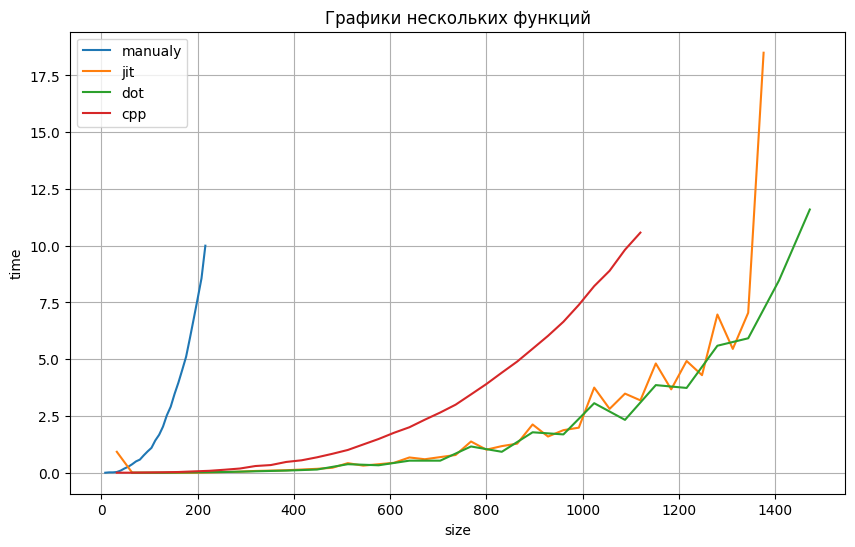

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Строим графики для каждого набора данных
plt.plot(manualy_size, manualy_time, label='manualy')
plt.plot(jit_size, jit_time, label='jit')
plt.plot(dot_size, dot_time, label='dot')
plt.plot(cpp_eigen_size, cpp_eigen_time, label='cpp')

# Добавляем заголовок и подписи осей
plt.title('Графики нескольких функций')
plt.xlabel('size')
plt.ylabel('time')
plt.ylim(0,10)

# Добавляем легенду
plt.legend()

# Отображаем график
plt.grid()
plt.show()